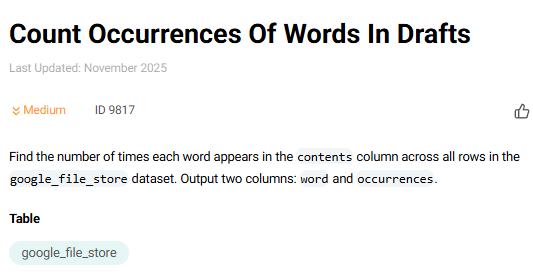

https://platform.stratascratch.com/coding/9817-find-the-number-of-times-each-word-appears-in-drafts?code_type=3

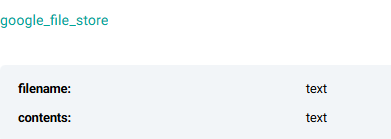

In [ ]:
SELECT * 
FROM google_file_store;

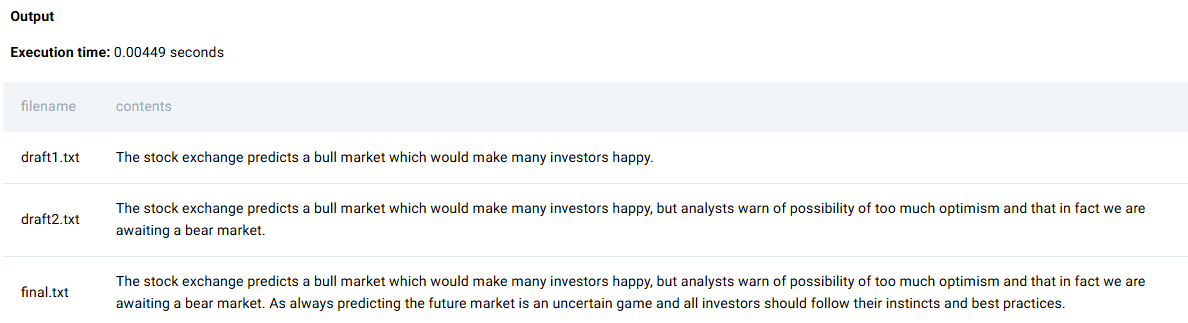

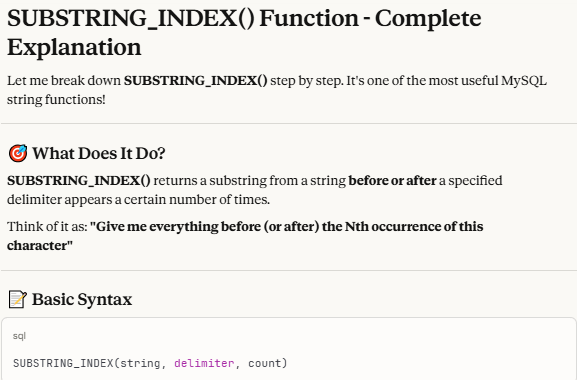

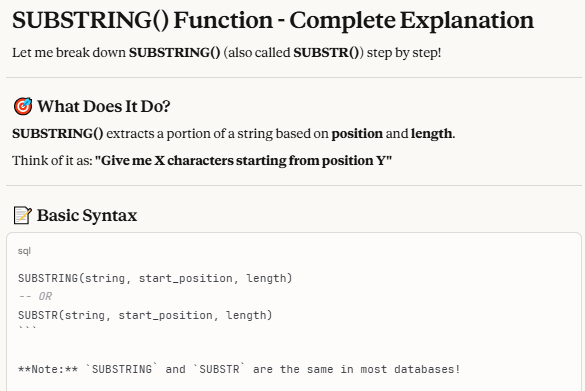

In [ ]:
SELECT
    LOWER(contents),
    LENGTH(contents),
    SUBSTRING_INDEX(contents, ' ',1), -- gets the first word before the first space.
    SUBSTRING_INDEX(contents, ' ',2),
    LENGTH(SUBSTRING_INDEX(contents, ' ',1)),
    SUBSTRING(contents,3), -- gets the string after the integer passed in the second parameter.
    SUBSTRING(contents,3 + 2)
FROM google_file_store;

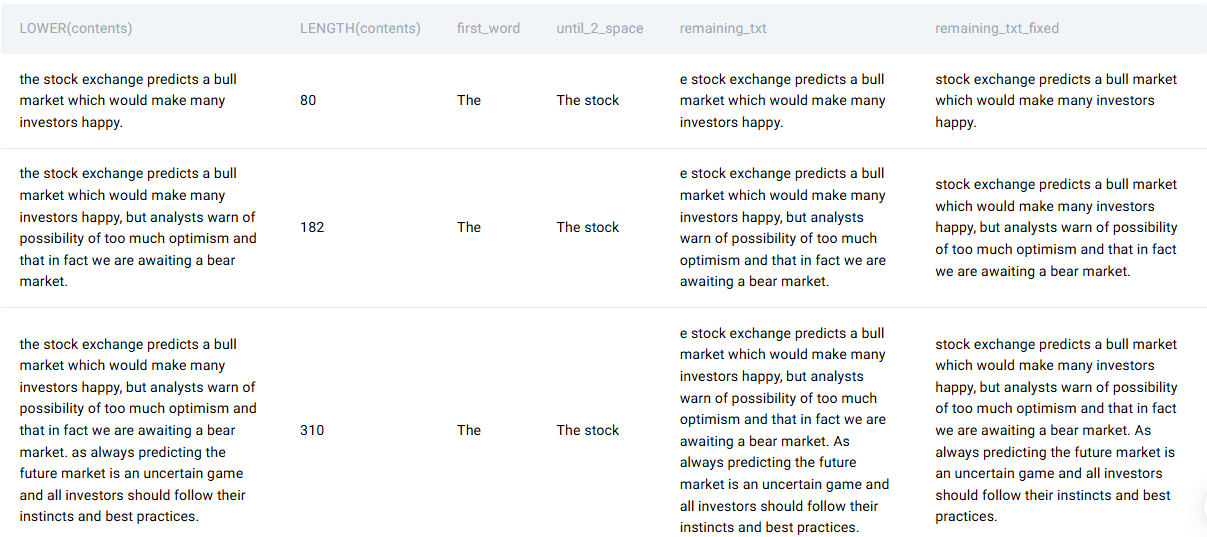

In [ ]:
-- Now that I have the first word, need to look for the next word.

WITH first_word AS (
    SELECT
        LOWER(contents) content,
        LENGTH(contents),
        SUBSTRING_INDEX(contents, ' ',1) first_word, -- gets the first word before the first space.
        SUBSTRING_INDEX(contents, ' ',2) until_2_space,
        -- LENGTH(SUBSTRING_INDEX(contents, ' ',1)),
        SUBSTRING(contents,3) remaining_txt, -- gets the string after the integer passed in the second parameter.
        SUBSTRING(contents,3 + 2) remaining_txt_fixed
    FROM google_file_store
)
SELECT
    content,
    remaining_txt_fixed,
    first_word,
    SUBSTRING_INDEX(remaining_txt_fixed,' ',1) next_word,
    INSTR(remaining_txt_fixed, ' '), -- counts how many times a txt caracter shows up
    SUBSTRING(remaining_txt_fixed, LENGTH(SUBSTRING_INDEX(remaining_txt_fixed,' ',1))+2) remaining_txt_fixed -- redefined the remaining txt removing the word that was already extrated.
FROM first_word

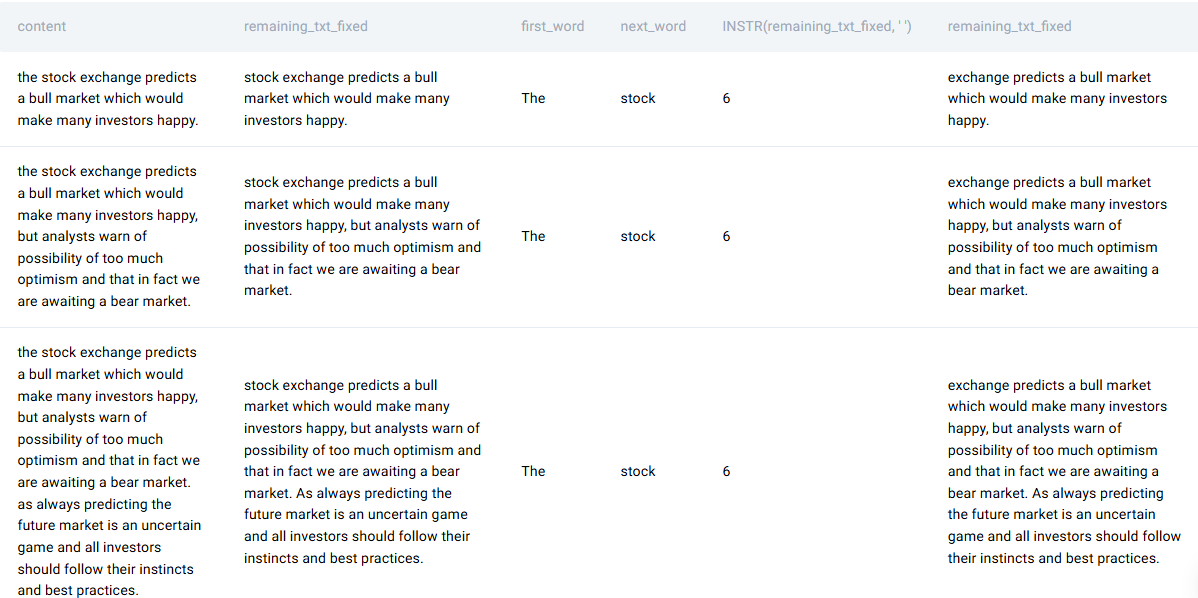

In [ ]:
-- Now I will need to us recoursivity to get all the words in a paragraph

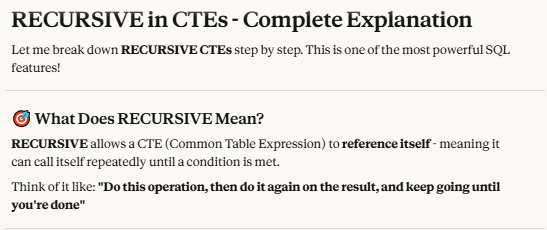
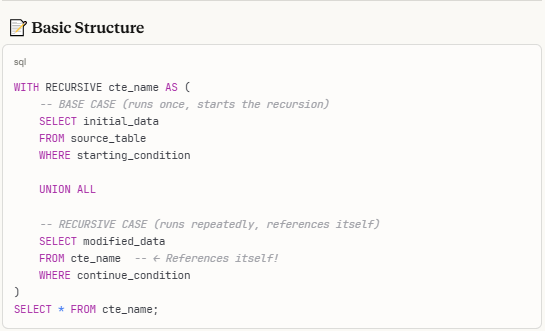
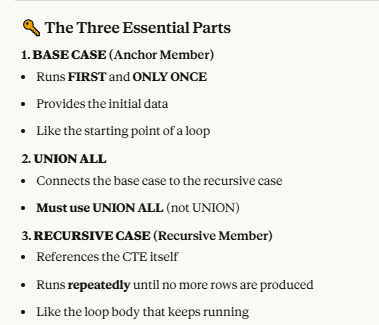

In [ ]:
-- Get the next words by using a recursive example

WITH RECURSIVE content_words AS (

    -- Start the recursive, get the first word
    SELECT
        LOWER(contents) content,
        LOWER(SUBSTRING_INDEX(contents, ' ',1)) word, -- gets the first word before the first space.
        SUBSTRING(contents,LENGTH(SUBSTRING_INDEX(contents, ' ',1)) + 2) remaining_txt
    FROM google_file_store

    UNION ALL

    -- Get all the other words in the text
    SELECT
        remaining_txt,
        SUBSTRING_INDEX(remaining_txt,' ',1) word,
        CASE
            WHEN INSTR(remaining_txt, ' ') > 0 THEN SUBSTRING(remaining_txt,LENGTH(SUBSTRING_INDEX(remaining_txt, ' ',1)) + 2)
            ELSE ''
        END remaining_txt
    FROM content_words
    WHERE 1=1
        AND remaining_txt != ''
)
SELECT 
    *
FROM content_words;

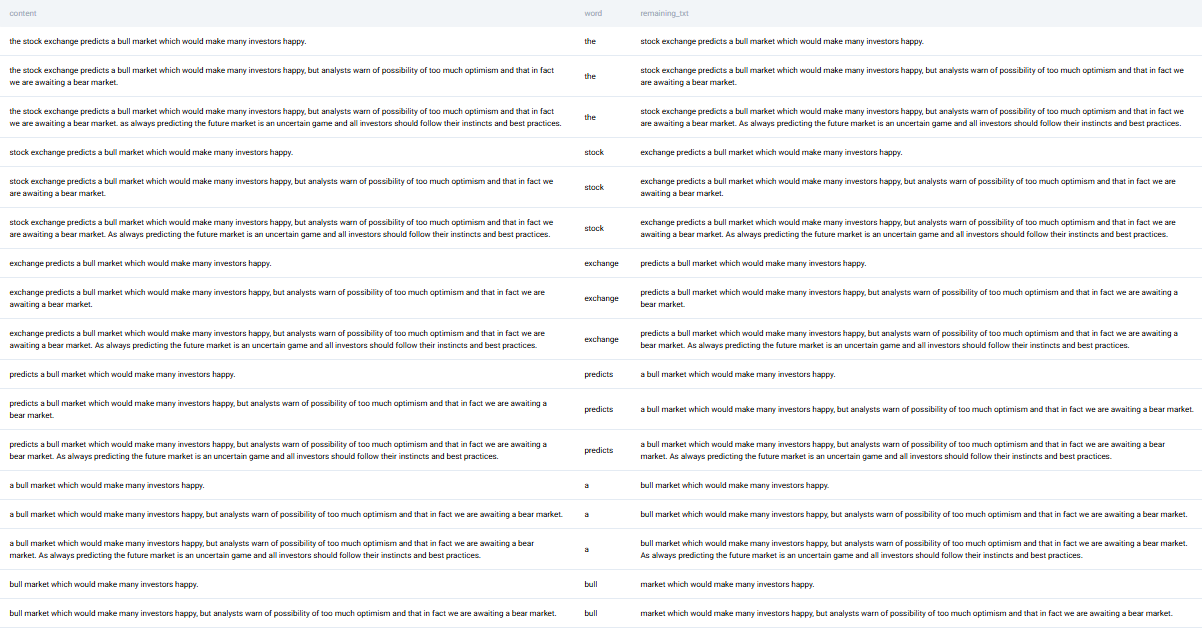

In [ ]:
-- Now just have to count unique words

WITH RECURSIVE content_words AS (

    -- Start the recursive, get the first word
    SELECT
        LOWER(contents) content,
        LOWER(SUBSTRING_INDEX(contents, ' ',1)) word, -- gets the first word before the first space.
        SUBSTRING(contents,LENGTH(SUBSTRING_INDEX(contents, ' ',1)) + 2) remaining_txt
    FROM google_file_store

    UNION ALL

    -- Get all the other words in the text
    SELECT
        remaining_txt,
        SUBSTRING_INDEX(remaining_txt,' ',1) word,
        CASE
            WHEN INSTR(remaining_txt, ' ') > 0 THEN SUBSTRING(remaining_txt,LENGTH(SUBSTRING_INDEX(remaining_txt, ' ',1)) + 2)
            ELSE ''
        END remaining_txt
    FROM content_words
    WHERE 1=1
        AND remaining_txt != ''
)
SELECT 
    word,
    COUNT(*) occurrences
FROM content_words
GROUP BY word
ORDER BY 2 DESC;

In [ ]:
-- Now just have to count unique words

WITH RECURSIVE content_words AS (

    -- Start the recursive, get the first word
    SELECT
        LOWER(contents) content,
        LOWER(SUBSTRING_INDEX(contents, ' ',1)) word, -- gets the first word before the first space.
        REPLACE(REPlACE(SUBSTRING(contents,LENGTH(SUBSTRING_INDEX(contents, ' ',1)) + 2), '.',''),',','') remaining_txt
    FROM google_file_store

    UNION ALL

    -- Get all the other words in the text
    SELECT
        remaining_txt,
        SUBSTRING_INDEX(remaining_txt,' ',1) word,
        CASE
            WHEN INSTR(remaining_txt, ' ') > 0 THEN SUBSTRING(remaining_txt,LENGTH(SUBSTRING_INDEX(remaining_txt, ' ',1)) + 2)
            ELSE ''
        END remaining_txt
    FROM content_words
    WHERE 1=1
        AND remaining_txt != ''
)
SELECT 
    word,
    COUNT(*) occurrences
FROM content_words
GROUP BY word
ORDER BY 2 DESC;

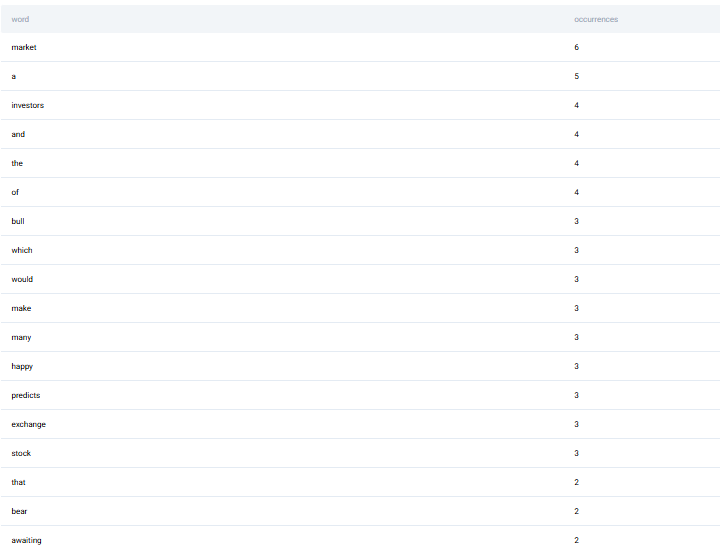